### STEP 1 : 시계열 데이터 준비
- 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume    
- 날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있지만, 우리는 Close만 사용하겠습니다. (주식 시장은 정해진 시간 동안만 거래가 가능합니다. 종가란 하루의 장이 마감하였을 때의 가격입니다.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Time Series 생성
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
print(df.head())
ts = df['Close']
print(type(ts))
print(ts.head())

Illegal line #217
	"       - 'Nanum'
"
	in file "/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc"


<class 'pandas.core.frame.DataFrame'>
              Open    High     Low   Close  Adj Close      Volume
Date                                                             
2000-01-04  6000.0  6110.0  5660.0  6110.0   0.090599  74195000.0
2000-01-05  5800.0  6060.0  5520.0  5580.0   0.082740  74680000.0
2000-01-06  5750.0  5780.0  5580.0  5620.0   0.083333  54390000.0
2000-01-07  5560.0  5670.0  5360.0  5540.0   0.082147  40305000.0
2000-01-10  5600.0  5770.0  5580.0  5770.0   0.085558  46880000.0
<class 'pandas.core.series.Series'>
Date
2000-01-04    6110.0
2000-01-05    5580.0
2000-01-06    5620.0
2000-01-07    5540.0
2000-01-10    5770.0
Name: Close, dtype: float64


### STEP 2 : 각종 전처리 수행
- 결측치 처리   
- 로그 변환

In [2]:
# 결측치 확인

ts[ts.isna()]  # Time Series에서 결측치가 있는 부분출력.

Date
2000-12-25   NaN
2001-01-23   NaN
2001-01-24   NaN
2001-01-25   NaN
2001-03-14   NaN
2005-01-03   NaN
2017-11-16   NaN
2017-11-23   NaN
2018-01-02   NaN
2018-11-15   NaN
2019-11-14   NaN
Name: Close, dtype: float64

In [3]:
# 결측치 보간. 보간기준 time

ts=ts.interpolate(method='time')
ts[ts.isna()]  

Series([], Name: Close, dtype: float64)

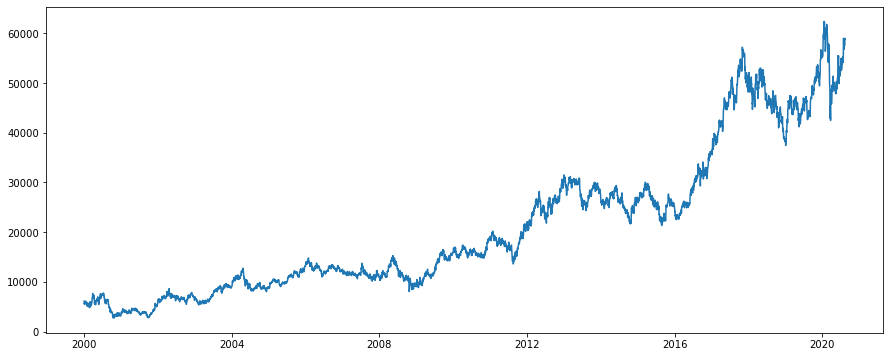

In [4]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    

plt.plot(ts)